<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿Qué-es-groupby()?" data-toc-modified-id="¿Qué-es-groupby()?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿Qué es <code>groupby()</code>?</a></span></li><li><span><a href="#Bases-del-groupby---agrupacion-por-una-categoría" data-toc-modified-id="Bases-del-groupby---agrupacion-por-una-categoría-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Bases del groupby - agrupacion por una categoría</a></span></li><li><span><a href="#Agrupación-por-múltiples-condiciones" data-toc-modified-id="Agrupación-por-múltiples-condiciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Agrupación por múltiples condiciones</a></span></li><li><span><a href="#Convertir-el-objeto-groupby-a-un-DataFrame" data-toc-modified-id="Convertir-el-objeto-groupby-a-un-DataFrame-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convertir el objeto groupby a un DataFrame</a></span></li><li><span><a href="#Agregación-(método-agg)" data-toc-modified-id="Agregación-(método-agg)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Agregación (método <code>agg</code>)</a></span></li><li><span><a href="#Tratamiento-de-nulos" data-toc-modified-id="Tratamiento-de-nulos-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tratamiento de nulos</a></span></li></ul></div>

In [2]:
# importamos las librerías que necesitamos

import pandas as pd

In [3]:
#ejecutemos este comando para ver todas las columnas

pd.options.display.max_columns = None

In [4]:
# En este jupyter trabajaremos con el dataset de Marketing que usamos en la lección de filtrado

df = pd.read_csv("./Marketing-Customer-Analysis.csv")
df.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [5]:
# cambiamos el nombre de las columnas

nuevas_columnas = {col: col.lower().replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [6]:
df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


# ¿Qué es `groupby()`?

En el análisis exploratorio de datos, a menudo nos queremos analizar los datos por algunas categorías. En **SQL**, la sentencia **GROUP BY** agrupa las filas que tienen los mismos valores. En `Pandas`, la operación GROUP BY de SQL se realiza mediante el `método groupby()`. 

El método groupby() facilita la exploración del conjunto de datos y desvela las relaciones subyacentes entre las variables


Este jupyter veremos:

- El proceso "group by": dividir-aplicar-combinar



- Agrupación por múltiples categorías



- Convertir el objeto groupby a un DataFrame¶



- Agregación


- Transformación


- Filtración




- Restablecimiento del índice con as_index


- Tratamiento de los valores perdidos

Antes de empezar con el código entendamos visualmente como funciona el `groupby`

![image.png](https://github.com/Adalab/data_imagenes/blob/main/Modulo-2/Pandas/groupby.png?raw=true)
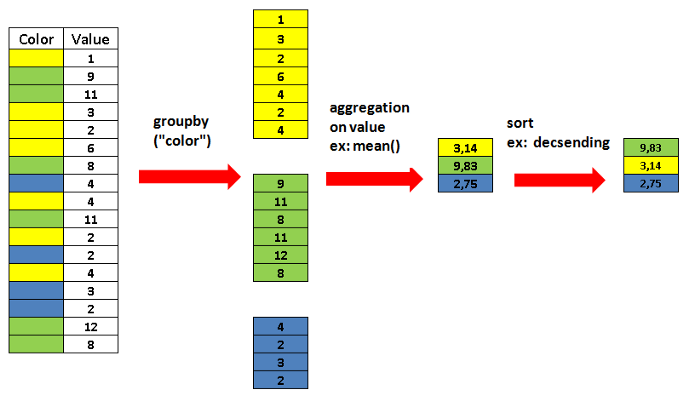

# Bases del groupby - agrupacion por una categoría

In [7]:
df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [8]:
# imaginemos que queremos agrupar por sexo

df_groupby_genero = df.groupby("gender")
df_groupby_genero

La función groupby() por si misma devuelve un objeto DataFrameGroupBy. Hay algunos atributos y métodos disponibles para que podamos acceder a la información de los grupos: 

In [9]:
# para acceder al número de grupos que tenemos. En nuestro caso tenemos dos grupos

df_groupby_genero.ngroups

2

In [10]:
# Utilizamos "groups" para obtener el indice de los los elementos. 

df_groupby_genero.groups

{'F': [0, 1, 2, 5, 6, 9, 11, 15, 19, 21, 23, 24, 26, 27, 28, 29, 34, 35, 37, 40, 41, 42, 45, 47, 48, 49, 51, 52, 55, 57, 58, 59, 61, 63, 64, 66, 67, 68, 69, 76, 80, 84, 87, 88, 91, 92, 94, 95, 96, 98, 100, 104, 105, 106, 108, 118, 119, 122, 124, 126, 129, 131, 132, 134, 136, 137, 138, 139, 142, 144, 146, 147, 148, 153, 154, 157, 159, 161, 162, 163, 166, 167, 168, 169, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 185, 186, 187, 188, 191, 193, ...], 'M': [3, 4, 7, 8, 10, 12, 13, 14, 16, 17, 18, 20, 22, 25, 30, 31, 32, 33, 36, 38, 39, 43, 44, 46, 50, 53, 54, 56, 60, 62, 65, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 89, 90, 93, 97, 99, 101, 102, 103, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 123, 125, 127, 128, 130, 133, 135, 140, 141, 143, 145, 149, 150, 151, 152, 155, 156, 158, 160, 164, 165, 170, 174, 182, 183, 184, 189, 190, 192, 196, 197, 199, 203, 204, 205, ...]}

In [11]:
# si queremos obtener un dataframe solo con los resultados de un grupo usaremos em método "get_group"

df_mujeres = df_groupby_genero.get_group("F")
df_mujeres.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [12]:
print(f"En la columna 'education' solo tenemos este valor {df_mujeres.gender.unique()}")
print("-----------------------------------------------------------------------------------")

En la columna 'education' solo tenemos este valor ['F']
-----------------------------------------------------------------------------------


Pero en realidad hasta aquí no hemos establecido ninguna relación ni calculado nada, solo hemos extraido ciertos datos. Imaginemos ahora que queremos calcular la media por género de todos los clientes para las varibales numéricas. 

La estructura del `groupby` será la misma solo que tendremos que añadir el estadístico que queramos aplicar después del groupby. 

In [13]:
df_groupby_genero_mean = df.groupby("gender").mean()
df_groupby_genero_mean

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
gender,,,,,,,,
F,8096.602370,38108.176471,93.087162,14.844998,47.949764,0.387076,2.928081,412.856483
M,7909.551488,37188.253575,93.356792,15.359249,48.184093,0.381591,3.005809,456.184439


Si analizamos la tabla anterior vemos que el `groupby` nos ha sacado la media para todas nuestras variables numéricas. Bien 💪! Ya tenemos nuestro primer análisis de nuestros datos. 

**Pero, ¿qué pasaría si yo solo quisiera de la media de una de las columnas?** Veamos como hacerlo

In [14]:
df_groupby_genero_polizas = df.groupby("gender")["number_of_policies"].mean()
df_groupby_genero_polizas

gender
F    2.928081
M    3.005809
Name: number_of_policies, dtype: float64

Genial! Ya tenemos que de media las mujeres contratan 2.92 polizas y los hombres 3.00

Otros estadísticos que podemos calcular con el groupby son: 

- `count()` – número de observaciones no nulas


- `describe()`: resumen de los principales estadísticos


- `sum()` – suma de todos los valores


- `mean()` – media de los valores


- `median()` – mediana de los valores


- `min()` – valor mínimo


- `max()` – valor máximo


- `std()` – desviación estándar


- `var()`– varianza

In [15]:
# veamos algún ejemplo con la desviación estándar. 

df_groupby_genero_polizas_std = df.groupby("gender")["number_of_policies"].std()
df_groupby_genero_polizas_std

gender
F    2.360877
M    2.419929
Name: number_of_policies, dtype: float64

In [16]:
# o contar cuantos clientes tenemos dentro de cada categoría

df_groupby_genero_polizas_count = df.groupby("gender")["number_of_policies"].count()
df_groupby_genero_polizas_count

gender
F    4658
M    4476
Name: number_of_policies, dtype: int64

# Agrupación por múltiples condiciones 

Hasta ahora hemos visto como hacer agrupaciones basándonos solo en una columna. Pero con este método podemos agrupar por más de una. En este caso tendremos que pasar **una lista con el nombre de las columnas** por las que queremos agrupar. Veamos como hacerlo: 

Imaginamos que queremos agrupar por el "género" y por el "tamaño del vehículo". 

In [17]:
df_genero_tamaño = df.groupby(["gender", "vehicle_size"])['number_of_policies'].mean()
df_genero_tamaño

gender  vehicle_size
F       Large           2.916832
        Medsize         2.918885
        Small           2.966414
M       Large           2.712018
        Medsize         3.032874
        Small           3.057075
Name: number_of_policies, dtype: float64

Interpretemos los resultados, el resultado de este groupby nos esta "contando":

- Dentro de las mujeres:

    - 2.91 mujeres de media tienen un coche grande
    - 2.91 mujeres de media tienen un coche mediano
    - 2.96 mujeres de media tienen un coche pequeño
    
    
- En el caso de los hombres:

    - 2.27 hombres de media tienen un coche grande
    - 3.03 hombres de media tienen un coche mediano
    - 3.05 hombres de media tienen un coche pequeño


# Convertir el objeto groupby a un DataFrame 

Como hemos visto, cuando queremos que nos devuelva solo una columna no nos devuelve un dataframe, pero con pandas lo podremos convertir sin problema: 

In [18]:
# tomemos como ejemplo el resultado de nuestro último groupby

df_genero_tamaño

gender  vehicle_size
F       Large           2.916832
        Medsize         2.918885
        Small           2.966414
M       Large           2.712018
        Medsize         3.032874
        Small           3.057075
Name: number_of_policies, dtype: float64

In [19]:
# si chequeamos su tipo vemos que es una Serie

type(df_genero_tamaño)

pandas.core.series.Series

Tenemos dos formas de convertir esta Serie a DataFrame: 

- Usando `pd.DataFrame()`


- Usando `reset_index()`

In [20]:
# 1️⃣ usando pd.DataFrame

dff_genero = pd.DataFrame(df_genero_tamaño)
dff_genero

number_of_policies
gender vehicle_size                    
F      Large                   2.916832
       Medsize                 2.918885
       Small                   2.966414
M      Large                   2.712018
       Medsize                 3.032874
       Small                   3.057075

Si nos fijamos las columnas por las que hemos agrupado están como índices. Recordemos que tenemos el método `reset_index()`

In [21]:
dff_genero.reset_index(inplace = True)

In [22]:
# veamos ahora nuestro dataframe. Yujuu ahora ya tenemos un dataframe con los resultados de nuestro groupby

dff_genero

,gender,vehicle_size,number_of_policies
0,F,Large,2.916832
1,F,Medsize,2.918885
2,F,Small,2.966414
3,M,Large,2.712018
4,M,Medsize,3.032874
5,M,Small,3.057075


In [23]:
# 2️⃣ Usando reset_index(). Es mucho más directo, en un solo paso somos capaces de convertir la Serie a dataframe
dff_genero2 = df_genero_tamaño.reset_index()
dff_genero2

,gender,vehicle_size,number_of_policies
0,F,Large,2.916832
1,F,Medsize,2.918885
2,F,Small,2.966414
3,M,Large,2.712018
4,M,Medsize,3.032874
5,M,Small,3.057075


# Agregación (método `agg`) 

Hasta ahora, cada vez que hacíamos una agrupación lo hacíamos solo para un estadístico, es decir, o la media, o la desviación estándar o la suma, etc.

Con el método `agg()` podemos indicar varios estadísticos a nuestra agrupación. 

En nuestro último ejemplo en este jupyter agrupamos nuestros datos por género y tamaño para calcular la media del número de polizas 👇🏽

In [24]:
df_genero_tamaño = df.groupby(["gender", "vehicle_size"])['number_of_policies'].mean()
df_genero_tamaño

gender  vehicle_size
F       Large           2.916832
        Medsize         2.918885
        Small           2.966414
M       Large           2.712018
        Medsize         3.032874
        Small           3.057075
Name: number_of_policies, dtype: float64

**¿Cómo podríamos hacer para calcular varios estadísticos?**

Lo que tendremos que hacer es añadir el método `agg` especificando en una lista los estadísticos que queremos calcular

In [25]:
df_mean_std = df.groupby(["gender", "vehicle_size"])['number_of_policies'].agg(["mean", 'std'])
df_mean_std.reset_index(inplace = True)
df_mean_std

,gender,vehicle_size,mean,std
0,F,Large,2.916832,2.472270
1,F,Medsize,2.918885,2.354516
2,F,Small,2.966414,2.322660
3,M,Large,2.712018,2.289515
4,M,Medsize,3.032874,2.448949
5,M,Small,3.057075,2.367252


Por defecto, se nos generan dos columnas con los nombres de los estadísticos que estamos calculando. 

Pero podemos establecer el nombre de estas columnas en el propio método `agg`

In [26]:
df_mean_std = df.groupby(["gender", "vehicle_size"])['number_of_policies'].agg(media_genero_tamaño =("mean"),
                                                                               std_genero_tamaño= ('std'))

df_mean_std.reset_index(inplace = True)
df_mean_std

,gender,vehicle_size,media_genero_tamaño,std_genero_tamaño
0,F,Large,2.916832,2.472270
1,F,Medsize,2.918885,2.354516
2,F,Small,2.966414,2.322660
3,M,Large,2.712018,2.289515
4,M,Medsize,3.032874,2.448949
5,M,Small,3.057075,2.367252


# Tratamiento de nulos

Por defecto el groupby ingnora los NaN cuando realiza el agrupamiento. podemos incluir el parámetro `dropna` (por defecto True) para que tenga en cuenta los NaN en el cálculo de los estadísticos. 

In [27]:
df_mean_std2 = df.groupby(["gender", "vehicle_size"], dropna = False)['number_of_policies'].agg(media_genero_tamaño =("mean"),
                                                                                               std_genero_tamaño= ('std'))

df_mean_std2


media_genero_tamaño  std_genero_tamaño
gender vehicle_size                                        
F      Large                    2.916832           2.472270
       Medsize                  2.918885           2.354516
       Small                    2.966414           2.322660
M      Large                    2.712018           2.289515
       Medsize                  3.032874           2.448949
       Small                    3.057075           2.367252

📌 **NOTA** En este caso los valores no cambian porque no tenemos ningún nulo en nuestro *dataframe*. Pero si los tuvieramos cambiarían los valores del groupby! 

**EJERCICIOS**

En la carpeta de *datos* tenéis un dataset que se llama "titanic.csv": 

1️⃣ Cargar el dataset

2️⃣ ¿Cuánta gente sobrevivió de media en función de la clase? 

3️⃣ ¿Hubo diferencia entre sexos y clases en la media de personas que sobrevivieron? 

3️⃣ ¿Hubo diferencia entre sexos y clases en la media de personas que sobrevivieron? 

4️⃣ Calcula la media, la mediana y mediana de la edad en funcion de la clase. 